In [1]:
from sqlalchemy import create_engine
import pandas as pd

from data_generator.main import DiscriminationData
from path import HERE

DB_PATH = HERE.joinpath('experiments/discrimination_detection_results5.db')
conn = create_engine(f'sqlite:///{DB_PATH}')

In [2]:
import json

random_experiment_id = 'bff3c337-f2f1-4e05-bcdd-75bb09a874a4'
df_synth = pd.read_sql_query(
    f"SELECT experiment_id, full_data FROM synthetic_data where experiment_id='{random_experiment_id}'", conn)
df_synth = pd.DataFrame(json.loads(df_synth['full_data'].iloc[0]))
df_synth['experiment_id'] = random_experiment_id
df_synth.head()

,Attr1_X,Attr2_X,Attr3_X,Attr4_X,Attr5_X,Attr1_T,Attr2_T,Attr3_T,Attr4_T,Attr5_T,...,actual_mean_diff_outcome,relevance,calculated_magnitude,calculated_group_size,calculated_granularity,calculated_intersectionality,calculated_uncertainty,calculated_similarity,calculated_subgroup_ratio,experiment_id
106,0,0,0,0,0,0,0,0,1,0,...,0.5,0.567423,0.5,0.049351,0.2,0.2,0.002579,0.0,2.8,bff3c337-f2f1-4e05-bcdd-75bb09a874a4
107,0,0,0,0,0,0,0,0,1,0,...,0.5,0.567423,0.5,0.049351,0.2,0.2,0.002579,0.0,2.8,bff3c337-f2f1-4e05-bcdd-75bb09a874a4
108,0,0,0,0,0,0,0,0,1,0,...,0.5,0.567423,0.5,0.049351,0.2,0.2,0.002579,0.0,2.8,bff3c337-f2f1-4e05-bcdd-75bb09a874a4
109,0,0,0,0,0,0,0,0,1,0,...,0.5,0.567423,0.5,0.049351,0.2,0.2,0.002579,0.0,2.8,bff3c337-f2f1-4e05-bcdd-75bb09a874a4
110,0,0,0,0,0,0,0,0,1,0,...,0.5,0.567423,0.5,0.049351,0.2,0.2,0.002579,0.0,2.8,bff3c337-f2f1-4e05-bcdd-75bb09a874a4


In [3]:
random_experiment_id = 'bff3c337-f2f1-4e05-bcdd-75bb09a874a4'
df_result = pd.read_sql_query(
    f"SELECT * FROM augmented_results ar left join main.analysis_metadata am on am.analysis_id=ar.analysis_id where experiment_id='{random_experiment_id}'",
    conn)
df_result_data = pd.DataFrame(list(df_result['data'].apply(json.loads)))
df_result = pd.concat([df_result.reset_index(drop=True), df_result_data.reset_index(drop=True)], axis=1)
df_result.head()

,analysis_id,indv_key,couple_key,is_original_data,is_individual_part_of_a_group,is_couple_part_of_a_group,matching_groups,data,analysis_id,experiment_id,...,Attr1_T,Attr2_T,Attr2_X,Attr3_T,Attr3_X,Attr4_X,Attr5_X,Attr4_T,Attr5_T,outcome
0,e8fa4983-30ed-4e09-a286-427e84c323f8,2|4|0|4|4|1|0|2|0|5,2|4|0|4|4|1|0|2|0|5-2|0|0|4|4|1|0|2|0|5,0,0,0,[],"{""Attr1_X"": 2, ""Attr1_T"": 4, ""Attr2_T"": 0, ""At...",e8fa4983-30ed-4e09-a286-427e84c323f8,bff3c337-f2f1-4e05-bcdd-75bb09a874a4,...,4,0,4,4,1,0,2,0,5,0
1,e8fa4983-30ed-4e09-a286-427e84c323f8,2|0|0|4|4|1|0|2|0|5,2|0|0|4|4|1|0|2|0|5-2|4|0|4|4|1|0|2|0|5,0,0,0,[],"{""Attr1_X"": 2, ""Attr1_T"": 0, ""Attr2_T"": 0, ""At...",e8fa4983-30ed-4e09-a286-427e84c323f8,bff3c337-f2f1-4e05-bcdd-75bb09a874a4,...,0,0,4,4,1,0,2,0,5,3
2,e8fa4983-30ed-4e09-a286-427e84c323f8,2|0|0|4|3|0|3|2|4|2,2|0|0|4|3|0|3|2|4|2-2|3|0|4|3|0|3|2|4|2,0,0,0,[],"{""Attr1_X"": 2, ""Attr1_T"": 0, ""Attr2_T"": 0, ""At...",e8fa4983-30ed-4e09-a286-427e84c323f8,bff3c337-f2f1-4e05-bcdd-75bb09a874a4,...,0,0,4,3,0,3,2,4,2,1
3,e8fa4983-30ed-4e09-a286-427e84c323f8,2|3|0|4|3|0|3|2|4|2,2|3|0|4|3|0|3|2|4|2-2|0|0|4|3|0|3|2|4|2,0,0,0,[],"{""Attr1_X"": 2, ""Attr1_T"": 3, ""Attr2_T"": 0, ""At...",e8fa4983-30ed-4e09-a286-427e84c323f8,bff3c337-f2f1-4e05-bcdd-75bb09a874a4,...,3,0,4,3,0,3,2,4,2,3
4,e8fa4983-30ed-4e09-a286-427e84c323f8,0|2|3|3|2|1|3|1|2|2,0|2|3|3|2|1|3|1|2|2-0|0|3|3|2|1|3|1|2|2,0,0,0,[],"{""Attr1_X"": 0, ""Attr1_T"": 2, ""Attr2_T"": 3, ""At...",e8fa4983-30ed-4e09-a286-427e84c323f8,bff3c337-f2f1-4e05-bcdd-75bb09a874a4,...,2,3,3,2,1,3,1,2,2,1


In [4]:
feature_cols = list(filter(lambda x: 'Attr' in x, df_synth.columns))

In [5]:
from itertools import combinations
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from typing import List, Dict, Any


def generate_distinct_colors(n: int) -> List[str]:
    colors = []
    for i in range(n):
        hue = i * 0.618033988749895 % 1
        saturation = 0.7 + np.random.random() * 0.3
        value = 0.8 + np.random.random() * 0.2
        rgb = plt.cm.hsv(hue)[:3]  # Convert to RGB
        hex_color = '#{:02x}{:02x}{:02x}'.format(
            int(rgb[0] * 255),
            int(rgb[1] * 255),
            int(rgb[2] * 255)
        )
        colors.append(hex_color)
    return colors


def sort_two_strings(str1: str, str2: str) -> tuple[str, str]:
    if str1 <= str2:
        return (str1, str2)
    return (str2, str1)


def prepare_result_combinations(df: pd.DataFrame, feature_cols: List[str]) -> pd.DataFrame:
    all_combinations = []

    for couple_key in df['couple_key'].unique():
        # Sort the individual keys from the couple_key
        indivs = couple_key.split('-')
        sorted_indivs = sort_two_strings(indivs[0], indivs[1])

        # Create a new sorted couple_key
        sorted_couple_key = f"{sorted_indivs[0]}-{sorted_indivs[1]}"

        # Fetch data for each individual separately in sorted order
        indiv1_data = df[df['indv_key'] == sorted_indivs[0]]
        indiv2_data = df[df['indv_key'] == sorted_indivs[1]]

        # Combine the data in sorted order
        couple_data = pd.concat([indiv1_data, indiv2_data])

        if couple_data.shape[0] == 2:
            continue

        is_part_of_group = couple_data['is_couple_part_of_a_group'].iloc[0] != '0'
        unique_individuals = couple_data[feature_cols].drop_duplicates().values
        pairs = list(combinations(range(len(unique_individuals)), 2))

        for i, j in pairs:
            combination = {
                'couple_key': sorted_couple_key,  # Use the sorted couple_key
                'is_part_of_group': is_part_of_group
            }

            # Store individual feature values
            indiv1_features = unique_individuals[i]
            indiv2_features = unique_individuals[j]

            # Add the features in sorted order
            for idx, feat in enumerate(feature_cols):
                combination[f'{feat}_1'] = indiv1_features[idx]
                combination[f'{feat}_2'] = indiv2_features[idx]

            all_combinations.append(combination)

    return pd.DataFrame(all_combinations)

# Create combinations

In [6]:
synth_combinations_df = DiscriminationData.generate_individual_synth_combinations(df_synth)
result_combinations_df = prepare_result_combinations(df_result, feature_cols)

In [7]:
synth_combinations_df.head()

,group_key,subgroup1_key,subgroup2_key,indv_key_1,indv_key_2,couple_key,Attr1_X_1,Attr1_X_2,Attr2_X_1,Attr2_X_2,...,Attr1_T_1,Attr1_T_2,Attr2_T_1,Attr2_T_2,Attr3_T_1,Attr3_T_2,Attr4_T_1,Attr4_T_2,Attr5_T_1,Attr5_T_2
0,*|*|*|0|*|*|*|*|1|*-*|*|*|1|*|*|*|*|2|*,*|*|*|0|*|*|*|*|1|*,*|*|*|1|*|*|*|*|2|*,0|0|0|0|0|0|0|0|1|0,0|0|0|1|0|0|0|0|2|0,0|0|0|0|0|0|0|0|1|0-0|0|0|1|0|0|0|0|2|0,0,0,0,0,...,0,0,0,0,0,0,1,2,0,0
1,*|*|*|0|*|*|*|*|1|*-*|*|*|1|*|*|*|*|2|*,*|*|*|0|*|*|*|*|1|*,*|*|*|1|*|*|*|*|2|*,0|0|0|0|0|0|0|0|1|0,0|0|0|1|0|0|0|0|2|0,0|0|0|0|0|0|0|0|1|0-0|0|0|1|0|0|0|0|2|0,0,0,0,0,...,0,0,0,0,0,0,1,2,0,0
2,*|*|*|0|*|*|*|*|1|*-*|*|*|1|*|*|*|*|2|*,*|*|*|0|*|*|*|*|1|*,*|*|*|1|*|*|*|*|2|*,0|0|0|0|0|0|0|0|1|0,0|0|0|1|0|0|0|0|2|0,0|0|0|0|0|0|0|0|1|0-0|0|0|1|0|0|0|0|2|0,0,0,0,0,...,0,0,0,0,0,0,1,2,0,0
3,*|*|*|0|*|*|*|*|1|*-*|*|*|1|*|*|*|*|2|*,*|*|*|0|*|*|*|*|1|*,*|*|*|1|*|*|*|*|2|*,0|0|0|0|0|0|0|0|1|0,0|0|0|1|0|0|0|0|2|0,0|0|0|0|0|0|0|0|1|0-0|0|0|1|0|0|0|0|2|0,0,0,0,0,...,0,0,0,0,0,0,1,2,0,0
4,*|*|*|0|*|*|*|*|1|*-*|*|*|1|*|*|*|*|2|*,*|*|*|0|*|*|*|*|1|*,*|*|*|1|*|*|*|*|2|*,0|0|0|0|0|0|0|0|1|0,0|0|0|1|0|0|0|0|2|0,0|0|0|0|0|0|0|0|1|0-0|0|0|1|0|0|0|0|2|0,0,0,0,0,...,0,0,0,0,0,0,1,2,0,0


In [8]:
result_combinations_df.head()

,couple_key,is_part_of_group,Attr1_X_1,Attr1_X_2,Attr2_X_1,Attr2_X_2,Attr3_X_1,Attr3_X_2,Attr4_X_1,Attr4_X_2,...,Attr1_T_1,Attr1_T_2,Attr2_T_1,Attr2_T_2,Attr3_T_1,Attr3_T_2,Attr4_T_1,Attr4_T_2,Attr5_T_1,Attr5_T_2
0,2|0|0|4|3|0|3|2|4|2-2|3|0|4|3|0|3|2|4|2,False,2,2,4,4,0,0,3,3,...,0,3,0,0,3,3,4,4,2,2
1,2|0|0|4|3|0|3|2|4|2-2|3|0|4|3|0|3|2|4|2,False,2,2,4,4,0,0,3,3,...,0,3,0,0,3,3,4,4,2,2
2,0|0|3|3|2|1|3|1|2|2-0|2|3|3|2|1|3|1|2|2,False,0,0,3,3,1,1,3,3,...,0,2,3,3,2,2,2,2,2,2
3,0|0|3|3|2|1|3|1|2|2-0|2|3|3|2|1|3|1|2|2,False,0,0,3,3,1,1,3,3,...,0,2,3,3,2,2,2,2,2,2
4,0|0|3|1|5|0|1|2|3|2-0|5|3|1|5|0|1|2|3|2,False,0,0,1,1,0,0,1,1,...,0,5,3,3,5,5,3,3,2,2


In [9]:
# import matplotlib.pyplot as plt
# import numpy as np
# from itertools import product
# import pandas as pd
# 
# 
# # Generate all possible combinations
# def get_column_categories(df):
#     categories = {}
#     for column in df.columns:
#         categories[column] = sorted(df[column].unique().tolist())
#     return categories
# 
# 
# categories = get_column_categories(df_synth[list(filter(lambda x: 'Attr' in x, df_synth.columns))])
# combinations = list(product(*categories))
# 
# # Convert to numpy array and create a DataFrame
# data = np.array(combinations)
# df = pd.DataFrame(data, columns=[f'Category_{i + 1}' for i in range(len(categories))])
# df.head()

In [10]:
import pandas as pd
import itertools
import random


def generate_all_combinations(df, sample_percentage=1):
    if not 0 < sample_percentage <= 1:
        raise ValueError("sample_percentage must be between 0 and 100")
    unique_values = {col: df[col].unique() for col in df.columns}
    combinations = list(itertools.product(*unique_values.values()))
    total_combinations = len(combinations)
    sample_size = int(round(total_combinations * sample_percentage))
    if sample_percentage < 1:
        combinations = random.sample(combinations, sample_size)
    result = pd.DataFrame(combinations, columns=unique_values.keys())
    return result


In [11]:
df_synth_cols = df_synth[feature_cols + ['group_key']]
df_synth_cols.rename(columns={'group_key': 'label'}, inplace=True)
df_synth_new = generate_all_combinations(df_synth_cols[feature_cols], 0.0005)
df_synth_new.shape, df_synth_cols.shape

((6221, 10), (385, 11))

In [12]:
df_synth_new['label'] = None
df_synth_res = pd.concat([df_synth_cols, df_synth_new], ignore_index=True)

In [13]:
df_result_res = df_result[feature_cols + ['is_couple_part_of_a_group']]
df_result_res.rename(columns={'is_couple_part_of_a_group': 'label'}, inplace=True)
df_result_res_label = df_result_res['label'].replace({'0': 'not_part_of_a_group', '1': 'part_of_a_group'}).tolist()

In [14]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from umap.umap_ import UMAP


def preprocess(df):
    if "" in df.columns:
        df = df.drop("", axis=1)

    X_columns = [col for col in df.columns if col != 'label']
    X = df[X_columns].values
    y = df['label'].values

    # Handle string labels with LabelEncoder
    le = LabelEncoder()
    mask = ~pd.isna(y)
    y_encoded = np.full(len(y), -1)  # Initialize all with -1
    if mask.any():
        y_encoded[mask] = le.fit_transform(y[mask])

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    df[X_columns] = X_scaled
    df['label'] = y_encoded

    return df


df_synth_res_processed = preprocess(df_synth_res)
df_synth_res_processed1 = preprocess(df_synth_cols)
df_synth_res_processed2 = preprocess(df_synth_new)

umap_reducer = UMAP(
    min_dist=0.001,
    n_neighbors=10,
    n_components=2,
    init='pca',
    metric='euclidean',
    target_metric='categorical',
    target_weight=0.7,
    random_state=42,
    n_epochs=1000,
    verbose=True
)

embedding1 = umap_reducer.fit_transform(df_synth_res_processed1[feature_cols],
                                        df_synth_res_processed1['label'].tolist())
embedding2 = umap_reducer.transform(df_synth_res_processed2[feature_cols])
embedding3 = umap_reducer.transform(preprocess(df_result_res)[feature_cols])
embedding = np.concatenate((embedding1, embedding2, embedding3), axis=0)

UMAP(init='pca', min_dist=0.001, n_epochs=1000, n_jobs=1, n_neighbors=10, random_state=42, target_weight=0.7, verbose=True)
Wed Nov 20 21:21:09 2024 Construct fuzzy simplicial set
Wed Nov 20 21:21:10 2024 Finding Nearest Neighbors
Wed Nov 20 21:21:15 2024 Finished Nearest Neighbor Search
Wed Nov 20 21:21:21 2024 Construct embedding


Epochs completed:   2%| ▏          24/1000 [00:02]

	completed  0  /  1000 epochs


Epochs completed:  13%| █▎         131/1000 [00:02]

	completed  100  /  1000 epochs


Epochs completed:  22%| ██▏        220/1000 [00:03]

	completed  200  /  1000 epochs


Epochs completed:  33%| ███▎       328/1000 [00:03]

	completed  300  /  1000 epochs


Epochs completed:  44%| ████▍      438/1000 [00:04]

	completed  400  /  1000 epochs


Epochs completed:  53%| █████▎     527/1000 [00:04]

	completed  500  /  1000 epochs


Epochs completed:  63%| ██████▎    634/1000 [00:05]

	completed  600  /  1000 epochs


Epochs completed:  72%| ███████▏   722/1000 [00:05]

	completed  700  /  1000 epochs


Epochs completed:  83%| ████████▎  832/1000 [00:06]

	completed  800  /  1000 epochs


Epochs completed:  92%| █████████▏ 921/1000 [00:06]

	completed  900  /  1000 epochs


Epochs completed: 100%| ██████████ 1000/1000 [00:06]


Wed Nov 20 21:21:28 2024 Finished embedding


Epochs completed:   2%| ▏          7/333 [00:00]

	completed  0  /  333 epochs


Epochs completed:  13%| █▎         42/333 [00:00]

	completed  33  /  333 epochs


Epochs completed:  23%| ██▎        76/333 [00:01]

	completed  66  /  333 epochs


Epochs completed:  32%| ███▏       106/333 [00:02]

	completed  99  /  333 epochs


Epochs completed:  43%| ████▎      142/333 [00:02]

	completed  132  /  333 epochs


Epochs completed:  51%| █████      169/333 [00:03]

	completed  165  /  333 epochs


Epochs completed:  62%| ██████▏    208/333 [00:04]

	completed  198  /  333 epochs


Epochs completed:  72%| ███████▏   241/333 [00:04]

	completed  231  /  333 epochs


Epochs completed:  82%| ████████▏  273/333 [00:05]

	completed  264  /  333 epochs


Epochs completed:  92%| █████████▏ 306/333 [00:06]

	completed  297  /  333 epochs


Epochs completed: 100%| ██████████ 333/333 [00:06]


	completed  330  /  333 epochs


Epochs completed:   2%| ▏          6/333 [00:00]

	completed  0  /  333 epochs


Epochs completed:  11%| █          37/333 [00:01]

	completed  33  /  333 epochs


Epochs completed:  21%| ██         69/333 [00:02]

	completed  66  /  333 epochs


Epochs completed:  32%| ███▏       105/333 [00:03]

	completed  99  /  333 epochs


Epochs completed:  41%| ████       137/333 [00:04]

	completed  132  /  333 epochs


Epochs completed:  51%| █████      169/333 [00:05]

	completed  165  /  333 epochs


Epochs completed:  62%| ██████▏    205/333 [00:06]

	completed  198  /  333 epochs


Epochs completed:  72%| ███████▏   241/333 [00:07]

	completed  231  /  333 epochs


Epochs completed:  81%| ████████   269/333 [00:08]

	completed  264  /  333 epochs


Epochs completed:  92%| █████████▏ 305/333 [00:09]

	completed  297  /  333 epochs


Epochs completed: 100%| ██████████ 333/333 [00:10]

	completed  330  /  333 epochs


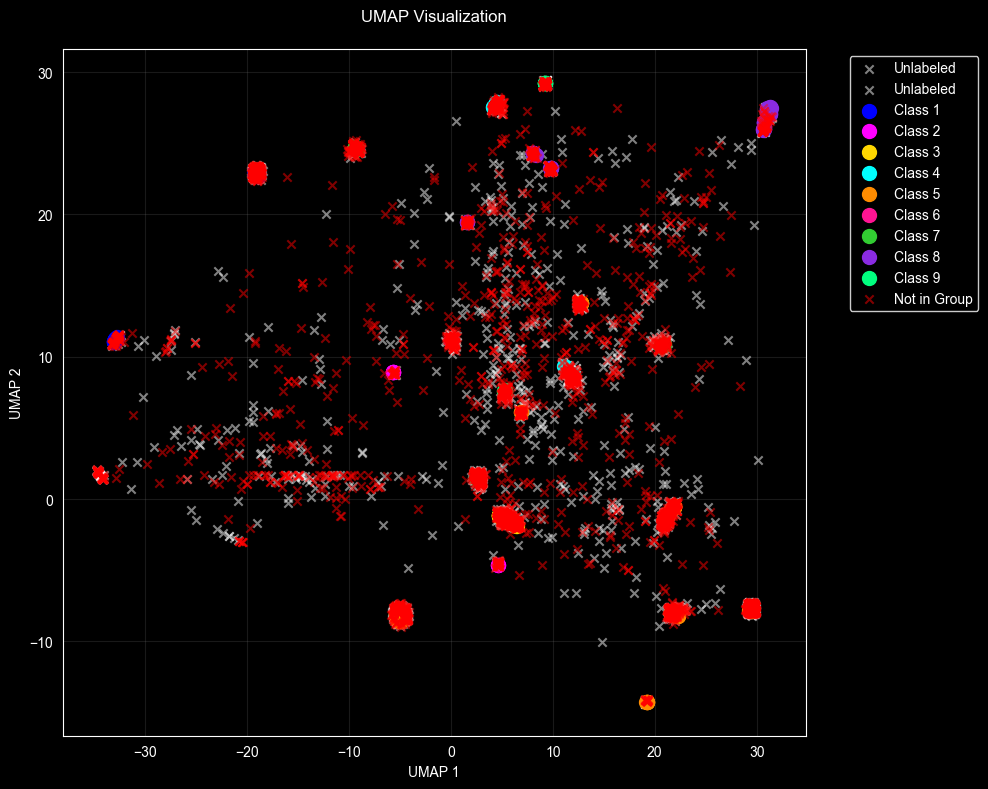

In [46]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import pdist, squareform


def plot_umap(embedding, labels, title="UMAP Visualization", min_distance=None):
    # plt.clf()
    plt.figure(figsize=(10, 8))

    unique_labels = np.unique(labels)

    # New brighter and more distinctive color palette
    distinctive_colors = [
        '#FF0000',  # Bright Red
        '#00FF00',  # Bright Green
        '#0000FF',  # Bright Blue
        '#FF00FF',  # Magenta
        '#FFD700',  # Gold
        '#00FFFF',  # Cyan
        '#FF8C00',  # Dark Orange
        '#FF1493',  # Deep Pink
        '#32CD32',  # Lime Green
        '#8A2BE2',  # Blue Violet
        '#00FF7F',  # Spring Green
        '#FF4500',  # Orange Red
        '#1E90FF',  # Dodger Blue
        '#FFFF00',  # Yellow
        '#FF69B4'  # Hot Pink
    ]

    # Ensure we have enough colors
    if len(unique_labels) > len(distinctive_colors):
        distinctive_colors = distinctive_colors * (len(unique_labels) // len(distinctive_colors) + 1)

    label_to_color = dict(zip(unique_labels, distinctive_colors[:len(unique_labels)]))

    plt.style.use('dark_background')

    distances = squareform(pdist(embedding))

    if min_distance is None:
        min_distance = np.percentile(distances, 20)

    for label in unique_labels:
        if label in ['0', '-1', 'not_part_of_a_group', 'part_of_a_group']:  # Skip unlabeled points
            continue

        mask = labels == label
        points = embedding[mask]
        color = label_to_color[label]

        if len(points) > 1:  # Only connect if there are at least 2 points
            # Get distances between points in this group
            group_distances = distances[mask][:, mask]

            # Connect points that are far apart
            for i in range(len(points)):
                for j in range(i + 1, len(points)):
                    if group_distances[i, j] > min_distance:
                        plt.plot([points[i, 0], points[j, 0]],
                                 [points[i, 1], points[j, 1]],
                                 color=color, alpha=0.2, linestyle='--', zorder=1, linewidth=0.8)

    # Plot points on top of connections
    for label in unique_labels:
        mask = np.array(labels) == label
        if label in ['0', '-1']:
            plt.scatter(embedding[mask, 0], embedding[mask, 1],
                        label='Unlabeled', alpha=0.5, marker='x',
                        color='white', zorder=1)

        elif label == 'not_part_of_a_group':
            plt.scatter(embedding[mask, 0], embedding[mask, 1],
                        label='Not in Group', alpha=0.5, marker='x',
                        color='red', zorder=3)
        
        elif label == 'part_of_a_group':
            plt.scatter(embedding[mask, 0], embedding[mask, 1],
                        label='In Group', alpha=0.5, marker='x',
                        color='green', zorder=3)

        else:
            plt.scatter(embedding[mask, 0], embedding[mask, 1],
                        label=f'Class {label}', alpha=1.0,  # Full opacity for maximum visibility
                        marker='o', color=label_to_color[label], zorder=2, s=100)  # Increased marker size

    plt.title(title, color='white', pad=20)
    plt.xlabel("UMAP 1", color='white')
    plt.ylabel("UMAP 2", color='white')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', facecolor='black', edgecolor='white')
    plt.grid(True, alpha=0.2, color='gray')
    plt.tight_layout()

    # Style the plot
    ax = plt.gca()
    ax.set_facecolor('black')  # Set plot background to black
    ax.spines['bottom'].set_color('white')
    ax.spines['top'].set_color('white')
    ax.spines['left'].set_color('white')
    ax.spines['right'].set_color('white')
    ax.tick_params(colors='white')

    plt.show()


labels = df_synth_res_processed1['label'].tolist() + df_synth_res_processed2['label'].tolist() + df_result_res_label
labels = list(map(lambda x: str(x), labels))

plot_umap(embedding, labels)